# Build a binary classification model to predict who is going to leave their credit card services.


In [16]:
# !pip install sklearn
from IPython.display import clear_output
import pandas as pd
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_validate
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
import seaborn as sn

2.4.0


In [17]:
bank_data=pd.read_csv("BankChurners.csv")

bank_data=bank_data.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

labelencoder = LabelEncoder()
bank_data['Attrition_Flag'] = labelencoder.fit_transform(bank_data['Attrition_Flag'])


bank_data['Education_Level'] = labelencoder.fit_transform(bank_data['Education_Level'])
bank_data['Marital_Status'] = labelencoder.fit_transform(bank_data['Marital_Status'])
bank_data['Gender'] = labelencoder.fit_transform(bank_data['Gender'])
bank_data['Income_Category'] = labelencoder.fit_transform(bank_data['Income_Category'])
bank_data['Card_Category'] = labelencoder.fit_transform(bank_data['Card_Category'])
bank_data


data_y=bank_data['Attrition_Flag'].to_numpy()
bank_data=bank_data.drop(columns=['Attrition_Flag'])
data_x=bank_data.to_numpy()

'''
Existing Customer=1
Attrited Customer=0


'''


'\nExisting Customer=1\nAttrited Customer=0\n\n\n'

In [18]:
x_1 = keras.Input(shape=(19,))
h1_1 = layers.Dense(10, activation='relu')(x_1)
h2_1 = layers.Dense(5, activation='relu')(h1_1)
h3_1 = layers.Dense(3, activation='relu')(h2_1)
outputs = layers.Dense(2,activation='softmax')(h3_1)
nn_model = keras.Model(inputs=x_1, outputs=outputs,name='nn_network')
nn_model.summary()
nn_model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

Model: "nn_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 19)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                200       
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 8         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [19]:
kf=KFold(n_splits=10,shuffle=True)
res=[]
nn_acc_score=0
nn_recall_macro_score=0
nn_recall_mirco_score=0
nn_precision_macro_score=0
nn_precision_micro_score=0
nn_f1_macro_score=0
nn_f1_micro_score=0
nn_auc_macro_score=0
nn_auc_micro_score=0

nn_confusion_matrix_sum=np.empty((2,2))
nn_confusion_matrix_sum[:]=0
for train_index,test_index in kf.split(data_x):
    x_train,x_test=data_x[train_index],data_x[test_index]
    y_train,y_test=data_y[train_index],data_y[test_index]
    train=nn_model.fit(data_x,data_y,
              batch_size=500, epochs=100, verbose=0,
              validation_data=(x_test,y_test),
            #   validation_split=0.1
              )
    res.append(train)
    y_pred=np.argmax(nn_model.predict(x_test),axis=1)
    nn_acc_score=nn_acc_score+accuracy_score(y_test,y_pred)
    nn_recall_macro_score=nn_recall_macro_score+recall_score(y_test, y_pred, average='macro')
    nn_recall_mirco_score=nn_recall_mirco_score+recall_score(y_test, y_pred, average='micro')
    nn_precision_macro_score=nn_precision_macro_score+precision_score(y_test, y_pred, average='macro')
    nn_precision_micro_score=nn_precision_micro_score+precision_score(y_test, y_pred, average='micro')
    nn_f1_macro_score=nn_f1_macro_score+f1_score(y_test, y_pred, average='macro')
    nn_f1_micro_score=nn_f1_micro_score+f1_score(y_test, y_pred, average='micro')
    nn_auc_macro_score=nn_auc_macro_score+roc_auc_score(y_test, y_pred, average='macro')
    nn_auc_micro_score=nn_auc_micro_score+roc_auc_score(y_test, y_pred, average='micro')
    nn_confusion_matrix_sum=nn_confusion_matrix_sum+confusion_matrix(y_test, y_pred)

# Compute the accuracy, precision, recall, F1-score (the harmonic mean of precision and recall), and AUC by stratified 10-fold cross-validation of your model obtained in (a).

平均
accuracy_score 0.8829959537865456
recall_macro_score_avg: 0.7544607963561869
recall_mirco_score_avg: 0.8829959537865456
precision_macro_score_avg: 0.819404285156075
precision_micro_score_avg: 0.8829959537865456
f1_macro_score 0.7642283395109857
f1_micro_score 0.8829959537865456
auc_macro_score 0.7544607963561869
auc_micro_score 0.7544607963561869
confusion_matrix_avg:
 [[ 92.1  70.6]
 [ 47.9 802.1]]


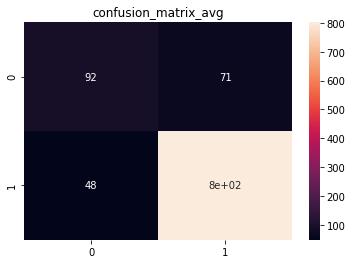

In [20]:
n=10
print("平均")
print("accuracy_score",nn_acc_score/n)
print("recall_macro_score_avg:",nn_recall_macro_score/n)
print("recall_mirco_score_avg:",nn_recall_mirco_score/n)
print("precision_macro_score_avg:",nn_precision_macro_score/n)
print("precision_micro_score_avg:",nn_precision_micro_score/n)
print("f1_macro_score",nn_f1_macro_score/n)
print("f1_micro_score",nn_f1_micro_score/n)
print("auc_macro_score",nn_auc_macro_score/n)
print("auc_micro_score",nn_auc_micro_score/n)
print("confusion_matrix_avg:\n",nn_confusion_matrix_sum/n)
plt.title('confusion_matrix_avg')
plt.ylabel('actual')
plt.xlabel('predict')

sn.heatmap(nn_confusion_matrix_sum/n,annot=True)

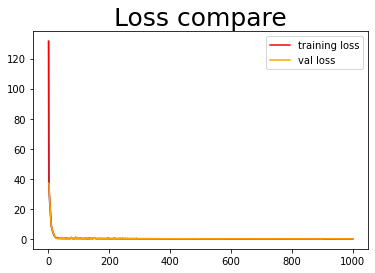

In [21]:
loss_pic=np.array([])
acc_pic=np.array([])
val_pic=np.array([])
plt.title("Loss compare",fontsize=25,)
for i in res:
    loss_pic=np.append(loss_pic,np.array(i.history['loss']))
plt.plot(loss_pic)
for i in res:
    val_pic=np.append(val_pic,np.array(i.history['val_loss']))
ep=range(1,len(loss_pic)+1)
plt.plot(ep,loss_pic,"red",label="training loss")
plt.plot(ep,val_pic,"orange",label="val loss")
plt.legend()
plt.show()

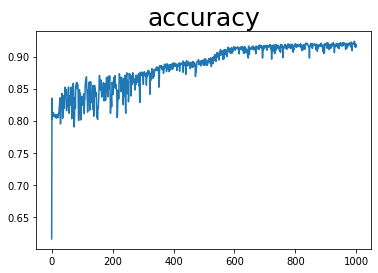

In [22]:
plt.title("accuracy",fontsize=25,)
for i in res:
    acc_pic=np.append(acc_pic,np.array(i.history['accuracy']))
plt.plot(acc_pic)

# Among the above metrics, which one would you use to evaluate your model according to the purpose of this dataset? Explain your reason.

銀行想要預測用戶會不會剪卡 

在預測是會的情況下 去挽回客戶 用precision

並且 同時希望模型可以更準確 確認實際剪卡的客戶是否有被我們成功預測到 用recall

但是我覺得 Precision和Recall都同等重要 那我就用F1

因為dataset的data unbalanced

所以用 precision macro,recall marco,f1marco

然後auc為趨近於1越好

